In [1]:
import os
os.chdir('/home/cjtu/projects/moonpies/moonpies')
import moonpies as mp
import default_config
import numpy as np
import matplotlib.pyplot as plt
cfg = default_config.Cfg()
time_arr = mp.get_time_array(cfg)
df = mp.read_crater_list(cfg.crater_csv_in, cfg.crater_cols)
ej_dists = mp.get_coldtrap_dists(df, cfg)
ej_cols, ej_names, bal_sed_time  = mp.get_ejecta_thickness_matrix(df, ej_dists, cfg)  # [m]

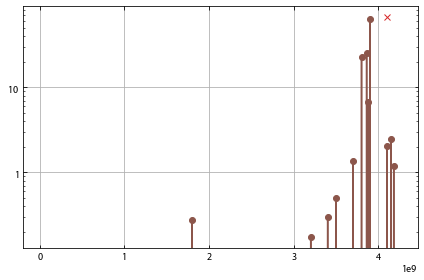

In [2]:
plt.semilogy(time_arr, bal_sed_time, 'x')
plt.semilogy(time_arr, np.mean(ej_cols, axis=1), 'o-')
plt.show()

In [10]:
ej_cols[time_arr == 3.2e9]

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        4.3315196, 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       ]], dtype=float32)

In [11]:
df.tail()

,cname,lat,lon,diam,age,age_low,age_upp,psr_area,age_ref,prio,notes,rad,x,y,dist2pole
20,Unnamed 3,-83.9,338.3,22300.0,3.400000e+09,500000000.0,100000000.0,NaN,Cannon et al. 2020,3,NaN,11150.0,-68263.828608,171539.426295,184972.437587
21,Wiechert U,-83.4,149.0,30000.0,3.400000e+09,700000000.0,100000000.0,NaN,Cannon et al. 2020,3,NaN,15000.0,102848.882960,-171169.285692,200134.112799
22,Wiechert J,-85.2,182.4,34900.0,3.200000e+09,100000000.0,300000000.0,371549000.0,Cannon et al. 2020,3,NaN,17450.0,-6087.961475,-145254.360392,145552.082036
23,Shackleton,-89.7,129.8,20900.0,3.150000e+09,80000000.0,50000000.0,233698000.0,Cannon et al. 2020,1,NaN,10450.0,6989.047218,-5823.054611,9097.005127
24,Amundsen C,-80.8,85.2,24200.0,1.800000e+09,200000000.0,200000000.0,NaN,Cannon et al. 2020,3,NaN,12100.0,276803.370441,23243.828444,278974.823902


In [12]:
bal_sed_time[245]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
bsed[24]

NameError: name 'bsed' is not defined

In [ ]:
np.where(bal_sed_time[230:]!=0) 

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False]])

In [ ]:
ej_distances = mp.get_crater_distances(df, cfg.dtype)
d_ac_he = ej_distances[24, 6]
d_ac_he
ej_thick = mp.get_ejecta_thickness(
    np.array([d_ac_he]),
    np.array([24200/2]),
    cfg
)
print('ej thickness', ej_thick)
bsed_ac_he = mp.get_ballistic_sed_depth(d_ac_he, 24200, cfg)
print('bsed', bsed_ac_he)

In [ ]:
ej_distances = mp.get_crater_distances(df, cfg.dtype)
rad = df.rad.values[:, np.newaxis]  # need to pass column vector of radii
bsed = mp.get_ballistic_sed_depth(ej_distances, rad*2, cfg)
bsed[24, :]

array([ 53.28296702,  56.90607815,  60.79999306,  73.45046607,
        45.05496024,  51.32969102, 108.66289475,  64.59651408,
        73.59486226,  48.60899284,  50.46359412,  62.92761056,
        63.97114485,  57.65264014,  57.60030848,  52.15250887,
        55.31350569,  51.90218312,  52.45602735,  69.50984619,
        48.85705421,  55.1135275 ,  51.02204092,  54.35403819,
                nan])

In [ ]:
np.testing.assert_almost_equal(bal_sed_time[245], bsed[24], 5)

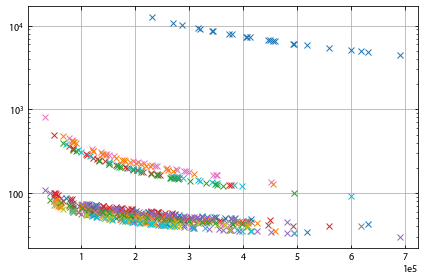

In [ ]:
for dist, depth in zip(ej_distances, bsed):
    plt.semilogy(dist, depth, 'x')
plt.show()

In [ ]:
ac_dists = ej_distances[24, :-1]
ac_diam = df.iloc[24].diam
bsed_depths = mp.get_ballistic_sed_depth(ac_dists, ac_diam, cfg)
bsed_depths

array([ 53.28296702,  56.90607815,  60.79999306,  73.45046607,
        45.05496024,  51.32969102, 108.66289475,  64.59651408,
        73.59486226,  48.60899284,  50.46359412,  62.92761056,
        63.97114485,  57.65264014,  57.60030848,  52.15250887,
        55.31350569,  51.90218312,  52.45602735,  69.50984619,
        48.85705421,  55.1135275 ,  51.02204092,  54.35403819])

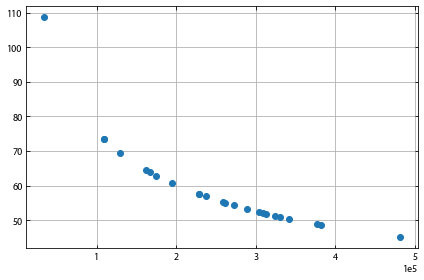

In [ ]:
plt.plot(ac_dists, bsed_depths, 'o')

In [ ]:
bal_sed_time[220:][bal_sed_time[220:] !=0]

array([ 53.282967,  56.90608 ,  60.79999 ,  73.45046 ,  45.05496 ,
        51.329693, 108.662895,  64.59651 ,  73.594864,  48.608994,
        50.463593,  62.927612,  63.971146,  57.65264 ,  57.600307,
        52.152508,  55.313507,  51.902184,  52.456028,  69.50985 ,
        48.857056,  55.11353 ,  51.02204 ,  54.35404 ,        nan],
      dtype=float32)